# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [31]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [32]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9670,7027,10471,541,4618,65
1,17623,4280,7305,2279,960,2616
2,796,5878,2109,340,232,776


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.092193,0.460681,0.601379,-0.202897,0.797424,-0.319492
1,0.721022,0.088478,0.268226,0.155108,0.030202,0.585084
2,-0.609457,0.304998,-0.278539,-0.244301,-0.122487,-0.067373


Fresh               8504.0
Milk                3627.0
Grocery             4756.0
Frozen              1526.0
Detergents_Paper     816.0
Delicatessen         966.0
dtype: float64

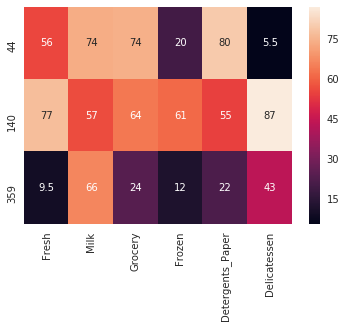

In [33]:
# TODO: Select three indices of your choice you wish to sample from the dataset
# changed from mean to median because  features' distribution is highly right-skewed
indices = [44,140,359]
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)
display((samples - np.round(data.median()))/data.std())
display(np.round(data.median()))


import seaborn as sns
percentiles_data = 100*data.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]
sns.heatmap(percentiles_samples, annot=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

* First customer (index=0) has a high `milk`, `grocery`, and `detergents_paper`. I would say this customers prefers urban groceries/market stores
* Second customer (index=1) has highest expenses in `delicatessen`, `fresh` and lower but still high on the rest. I would say this customer represent a supermarket store
* The third customer (index=2) has high expenditure `milk` and lower in `delicatessen` that sems to fit a restaurant/deli place.


This exercise helps a bit to get a sense that most customers have combination of establishments with some more represented than others. I find that there may be a category or two under represented than one category or two being overrepresented.  This dataset seems ripe for a market basket analysis.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [34]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
#import libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# test all six product categories to get a better sense of the data
# create loop to cycle to all features one at a time and calculate R_square(score)
for feature in data.keys():
    # replace random_state with a R^2 averaged over 100 iterations
    score_sum = 0 #reset to 0 after each 100x loop
    for l in range(100):
        y = data[feature]
        X = data.drop([feature], axis = 1)
        # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
        # Set a random state.
        X_train, X_test, y_train, y_test =  train_test_split(X , y, test_size=0.25)
        # TODO: Create a decision tree regressor and fit it to the training set
        regressor = DecisionTreeRegressor()
        regressor.fit(X_train,y_train)
        # TODO: Report the score of the prediction using the testing set
        score = regressor.score(X_test, y_test)
        score_sum +=score
        
    # calc average
    r_squared = score_sum/100
    print (str(feature)+ " has a R^2 score of " + str(np.round(r_squared, 2)))


Fresh has a R^2 score of -0.76
Milk has a R^2 score of 0.18
Grocery has a R^2 score of 0.68
Frozen has a R^2 score of -1.05
Detergents_Paper has a R^2 score of 0.68
Delicatessen has a R^2 score of -3.29


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

I attempted to predict all features (score results above). I replaced random_state option with a loop and calculated the average R^2 score after 100 iterations. I will keep the features that cannot be predicted by other feature because they provide unique information.

* `Fresh`, `Frozen`, and `Delicatessen` as dependent variables have negative R^2 scores. They are good for identifying customers' spending because the remaining features fail to fit the data.
* `Milk` has very low R2 score of 0.07. Similar with the above case of negative R^2  `milk`  is important for identifying customers' spending.
* `Grocery`, and `Detergents_Paper` have the highest scores (0.67 and 0.68) of all features, though not a great fit. They may not be needed relative to the other features.
 


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

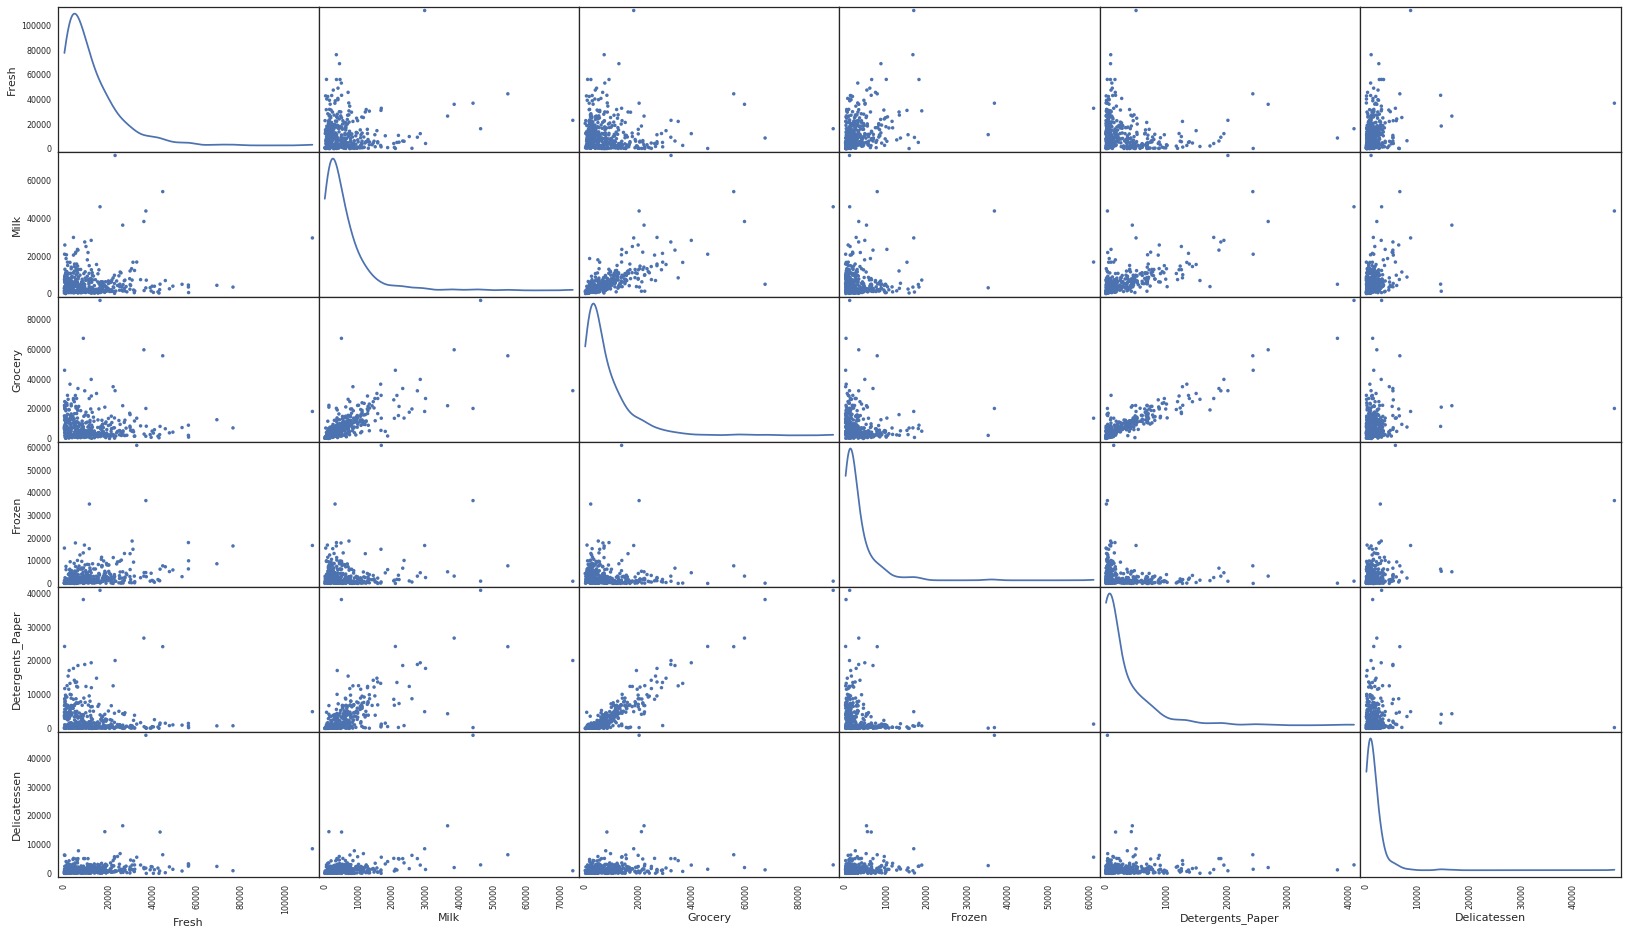

In [35]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 1, figsize = (28,16), diagonal = 'kde');

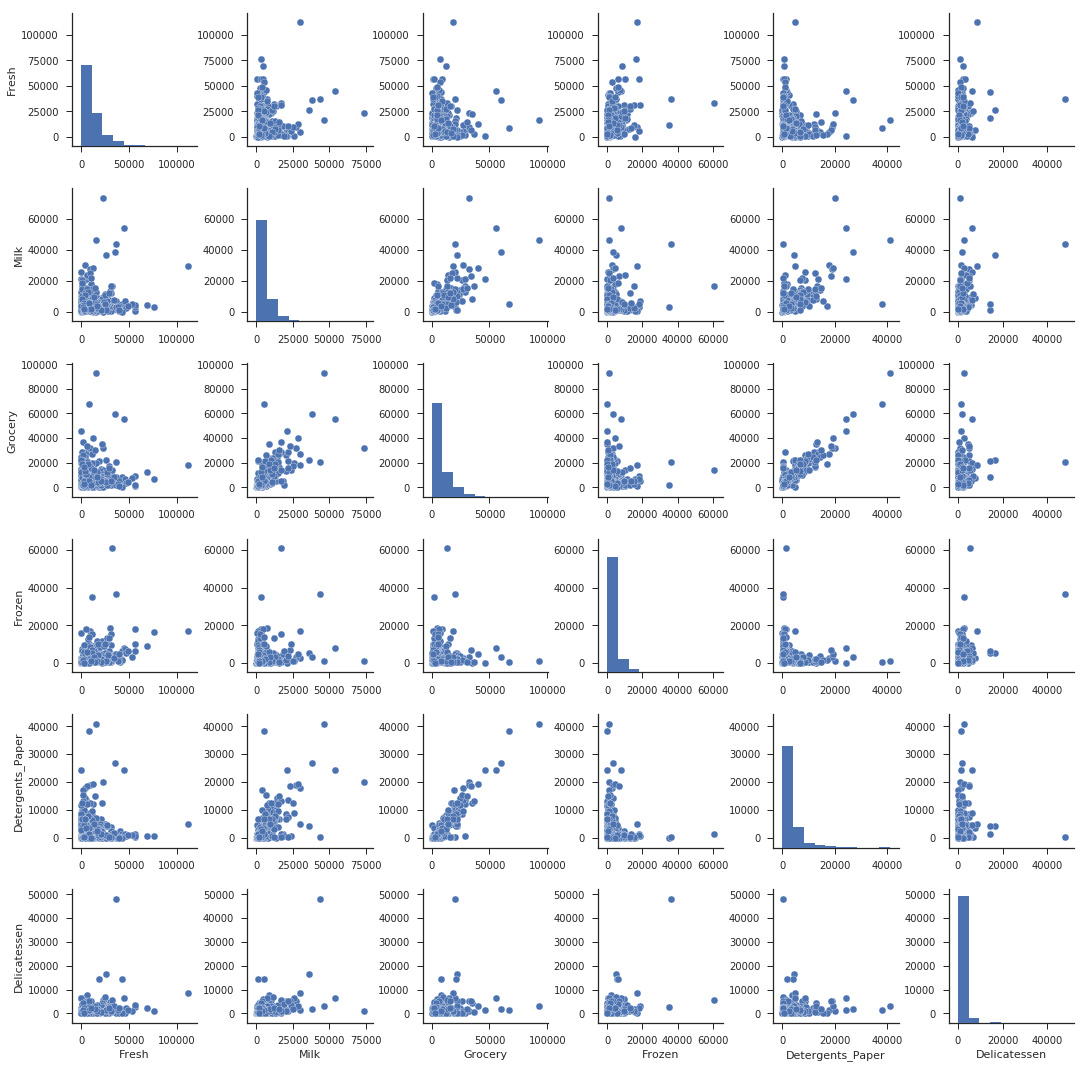

In [36]:
import seaborn as sns

sns.set(style="ticks")
sns.pairplot(data)

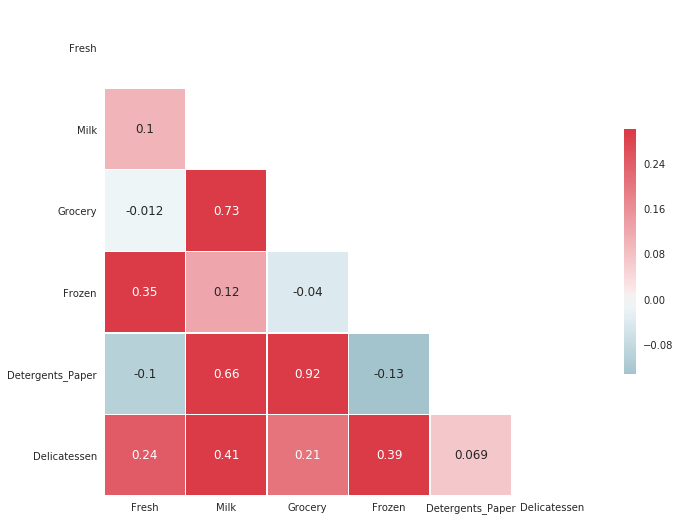

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) (the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

The most significant correlation is between Grocery and Detergents_Paper. Milk is also correlated with both these features, but the correlation is not very strong. This aligns with the R^2 interpretations from the previous question.

In addition, all features seem to have most of their data points concentrated around zero denoting a non normal distribution with a strong right skewness. Because GMM and Kmeans algorithms works for data features that are relatively normally distributed it will be necessary to normalize them.

I also observed outlier values for all features ranging from approximately 4 to 8 outlier per feature. In order to visualize the outlier better (and practice more) I changed some setting for the pandas scatter_matric and build a scatter matric with seaborn package as well.  

I also built a heatmap with correlation values. The heatmap confirms the findings from the scatter matrix.



## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

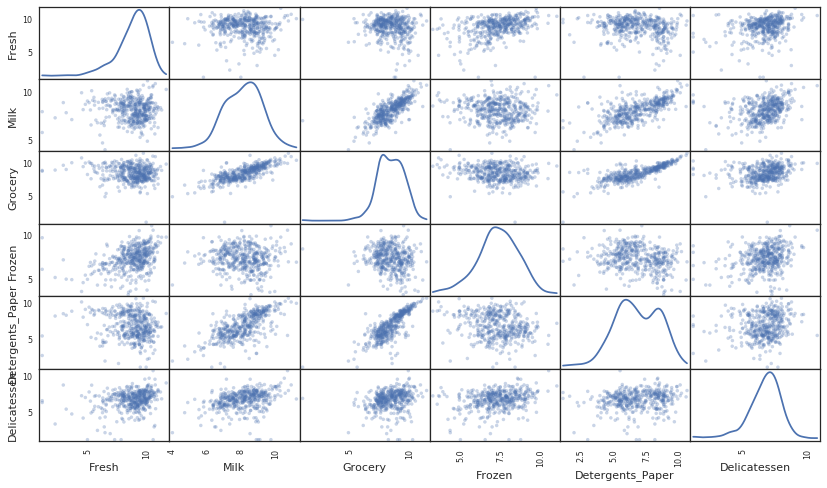

In [38]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [39]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.176784,8.857515,9.256365,6.293419,8.437717,4.174387
1,9.776960,8.361708,8.896314,7.731492,6.866933,7.869402
2,6.679599,8.678972,7.653969,5.828946,5.446737,6.654153


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [40]:
from collections import Counter
outliers_all = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    #add an outlier flag column to a copy of the dataset for an addtional chart
    log_data_1=log_data.copy()
    log_data_1['outlier'] = ~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))
    
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outliers_all.extend(list(feature_outliers.index.values))
    
# multiple feature outliers
outliers_mult = [item for item, count in Counter(outliers_all).items() if count > 1]

# OPTIONAL: Select the indices for data points you wish to remove
#outliers  = [65, 66 , 75, 128, 154]
outliers  = outliers_mult

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [41]:
outliers_mult

[65, 66, 128, 154, 75]

In [42]:
log_data_1.groupby('outlier').count()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
outlier,,,,,,
False,426,426,426,426,426,426
True,14,14,14,14,14,14


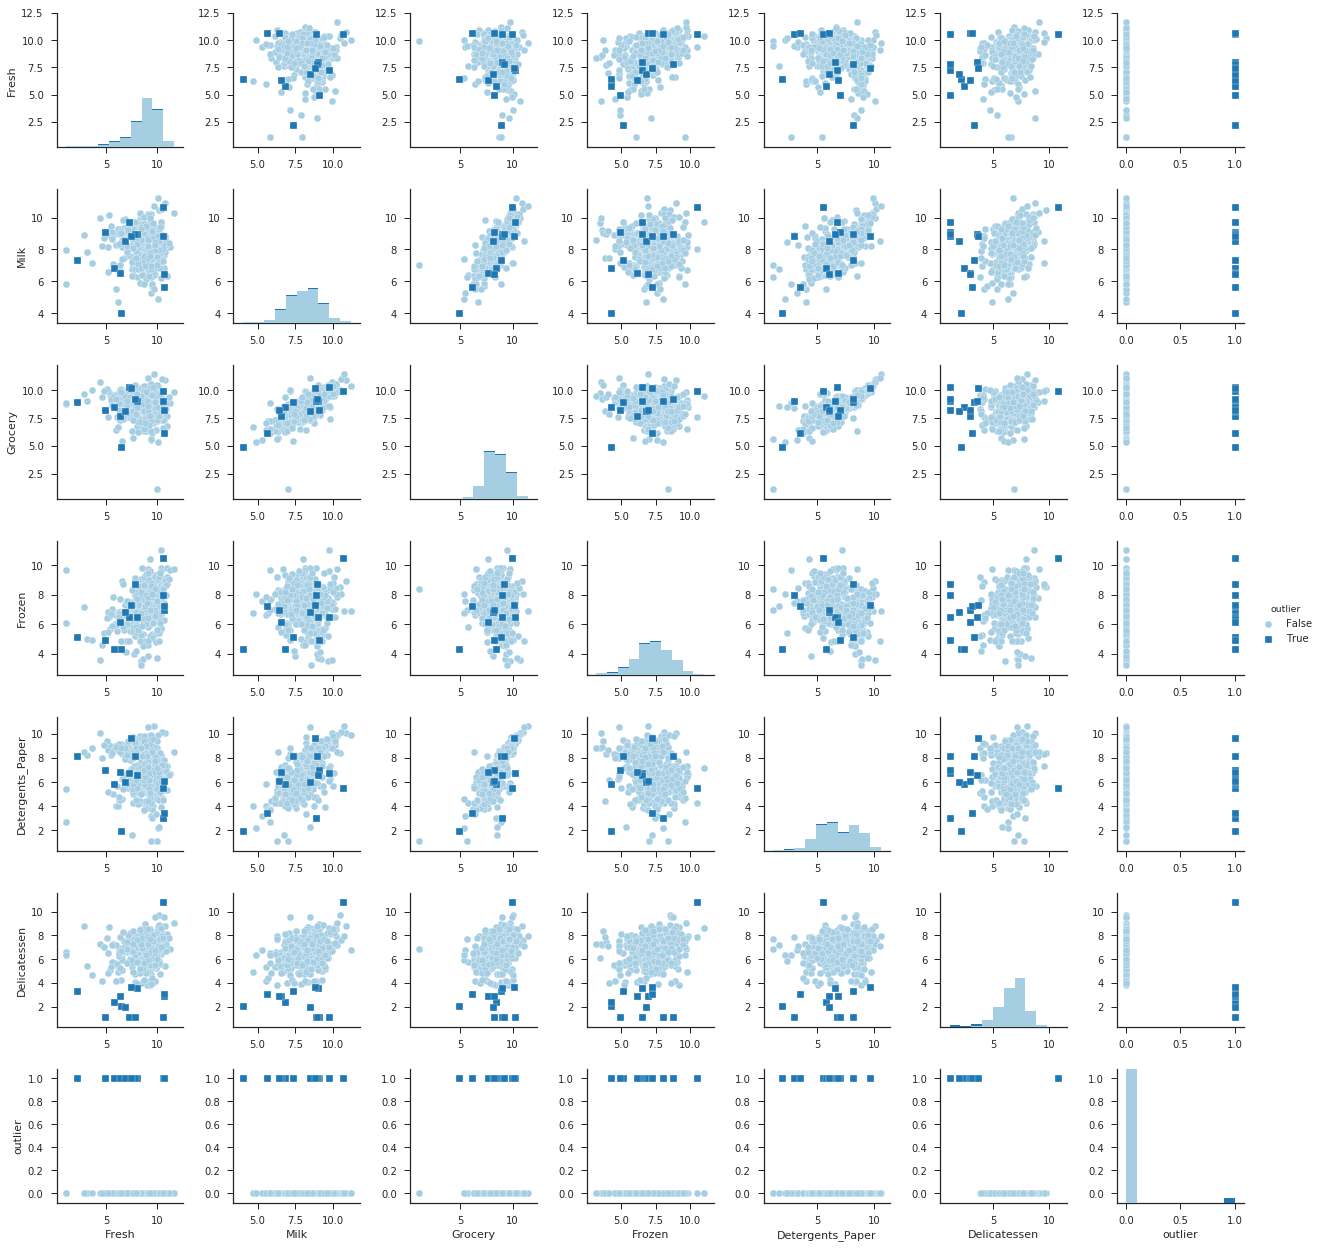

In [43]:
# a visual look at outliers data points
import seaborn as sns

sns.set(style="ticks")
sns.pairplot(log_data_1, hue='outlier', markers=["o", "s"],palette="Paired" )

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

If the answer is no then we keep the outliers. If the answer is yes and we see differences in the clusters then, in general, I follow these steps.

*	Is there a data cleansing issue:
    *	Yes: Can it be fixed?
        *	Yes: Fix and re-analyse
        *	No: Recode to missing
    *	No:
            *	Does it come from the target population?
                    * Yes: Transform and re-analyze
                    * No: Delete the observation

For this dataset, I assume there are no data cleansing issues. Next, I would look if they come from the target population. If they do not then I delete them. Again, I assume for this project that they come from the target population. 

According to the Tukey’s method for outlier detection, we have 42 outliers in total with five of them in more than one feature. Since our dataset has 440 observations, 9.5% are outliers (42/440). 

In the context of clustering outliers are important. Anscombe's quartet (https://en.wikipedia.org/wiki/Anscombe%27s_quartet) shows how outliers can have a big impact. I remove the five outliers that show in more than one product category based on the assumption that it is a data quality issue.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

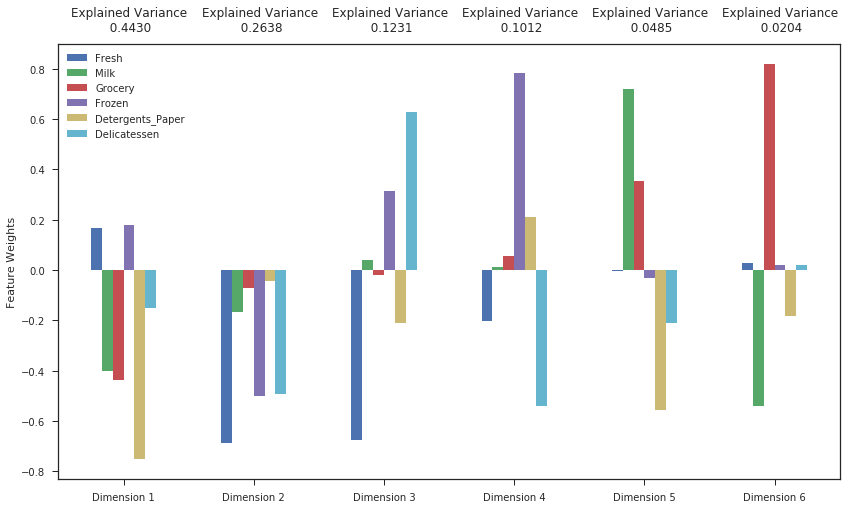

In [44]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [45]:
# Cumulative explained variance should add to 1
display(pca_results['Explained Variance'].cumsum())

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

In the first PC 44.30% of variance in the data is explained. In the first two PCs 70.68% of the variance in the data is explained. While a principal component by itself does not represent a particular type of customers, high/low values along the PC dimensions can help identify types of customers.

The first principal component is correlated with three of the six original variables `Detergents_Paper`, `Grocery`, and `Milk`. The first principal component decreases with `Detergents_Paper`, `Grocery`, and `Milk` scores.  This suggest that these three criteria vary together.  If one decreases, the others tend to decrease as well. I would say PC1 can be viewed as regular retailer of common households items and a measure of mainly   `Detergents_Paper` as it’s the only variable with a correlation score below -0.5. Furthermore, the first principal component explains the most cumulative variance in the original data.


The second principal component decreases with `Fresh`, `Delicatessen`, and `Frozen`. Only `Fresh` variable has a correlation below -0.5, but `Delicatessen`, and `Frozen` are very close to -0.5. This component can be viewed as farmer market for example or a similar establishment. It is also the second most important PC in terms of cumulative explained variance. 

The third principal component increases with increasing `Delicatessen` and to a lesser extent `Frozen` but decreases with decreasing `Fresh` feature. This component can be viewed as a 7-11 type of convenience store.

The fourth principal component increases with `Frozen` and decreases with `Delicatessen` and to a lesser extent `Fresh`. I would relate this PC with a smaller typical corner store convenience store.
In conclusion, the first two principal components are important.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [46]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.6103,1.2323,-2.5197,0.8701,0.4529,-0.0985
1,-0.2702,-1.5501,0.1689,-0.4826,0.0230,0.2804
2,0.5383,2.2224,1.2415,-1.0479,0.9276,-0.8047


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [47]:
# TODO: Apply PCA by fitting the good data with only two dimensions
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [48]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.6103,1.2323
1,-0.2702,-1.5501
2,0.5383,2.2224


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

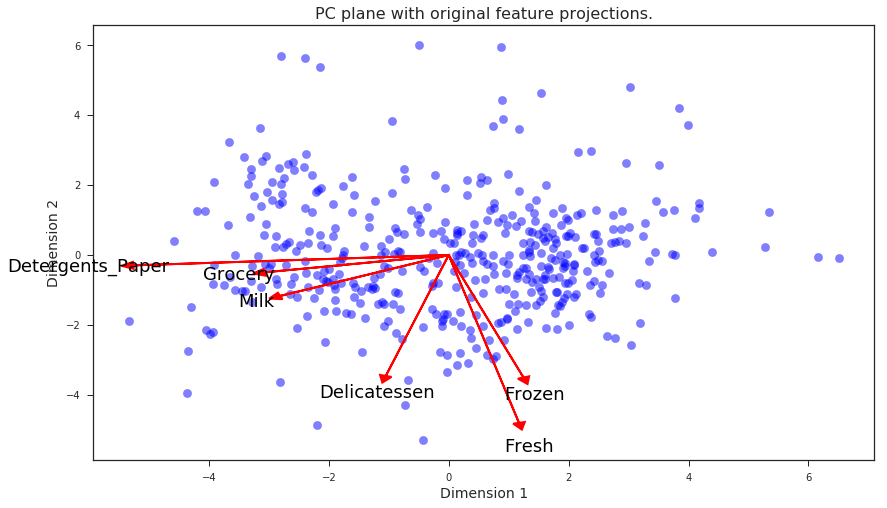

In [49]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

K-means clustering algorithm is probably the most used unsupervised learning. The concept behind k-mean is to group data by similarity. It is very fast, easy steps to implement and it can take advantage of parallel computing. 

When it is ok to run K-means?

Questions to ask:

    * Is the data featurized?
        * K-means needs a vector of data. Therefore the first thing is to turn all this information into an orderly vector
    * Is each feature a continuous number?
    * The third question is: are these numbers commensurate? If not perform scaling.
    * The forth question is : are there too many features? Perform dimensionality reduction. We used the most widely algorithm PCA. 
    * The fifth and last question to ask is: are there domain-specific reasons to change the features? This step is based on domain knowledge. This should be done before running PCA or K-means. It’s best to change any features that do not satisfy the assumptions of K-means by transforming the data. 
    
A drawback of K-mean algorithms is the fixed number of K clusters. In many cases if we have dynamic data such as streaming data where a fixed number of clusters is not ideal.

Another idea is that we may have data points that exhibit mixed membership. One real world example is dealing with pictures. For example, a picture that shows a dog and a cat at the same time. They can belong to multiple groups at the same time unlike clustering.  A method to tackle this is the probabilistic model called Gaussian Mixture Model or a LDA (latent dirichlet allocation) model.

A Gaussian Mixture Model is like a generalized k-means clustering to incorporate information about covariance structure of the data as well as the centers of the latent Gaussians. We can think of k-means algorithm as particular case of GMM.

I would look at our problem as a market basket analysis. People that by X tend to by Y. This information can be useful for products location display, for example. The classic example is that men tend to buy dippers hence it’s good idea to put beer next to dippers.  

The goal is to group customers according to their purchase behaviour. Since our data is continuous it makes sense to train a mixture model composed of Gaussian distributions, each having it own mean and variance parameters. This can be implemented using the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models. I think of an observation row as a basket of products per customer (aka. a grocery bill).

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [50]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# compare silhouette coefficient for each model by type and number of clusters
n_components_range = range(2, 6)
cv_types = ['spherical', 'tied', 'diag', 'full']

for cv_type in cv_types:
    for n_components in n_components_range:
        clusterer = GaussianMixture(n_components=n_components,covariance_type=cv_type, random_state=0)
        clusterer.fit(reduced_data)
    
        # TODO: Predict the cluster for each data point
        preds = clusterer.predict(reduced_data)
    
        # TODO: Find the cluster centers
        centers = clusterer.means_
    
        # TODO: Predict the cluster for each transformed sample data point
        sample_preds = clusterer.predict(pca_samples)
    
        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(reduced_data, preds)
        
        print (" GMM of type " + str(cv_type) + " and "+ str(n_components) + " clusters has a silhouette coefficient of " + str(np.round(score, 4)) + ".")

 GMM of type spherical and 2 clusters has a silhouette coefficient of 0.4239.
 GMM of type spherical and 3 clusters has a silhouette coefficient of 0.3662.
 GMM of type spherical and 4 clusters has a silhouette coefficient of 0.3332.
 GMM of type spherical and 5 clusters has a silhouette coefficient of 0.33.
 GMM of type tied and 2 clusters has a silhouette coefficient of 0.4232.
 GMM of type tied and 3 clusters has a silhouette coefficient of 0.2878.
 GMM of type tied and 4 clusters has a silhouette coefficient of 0.2771.
 GMM of type tied and 5 clusters has a silhouette coefficient of 0.1503.
 GMM of type diag and 2 clusters has a silhouette coefficient of 0.4237.
 GMM of type diag and 3 clusters has a silhouette coefficient of 0.3247.
 GMM of type diag and 4 clusters has a silhouette coefficient of 0.3342.
 GMM of type diag and 5 clusters has a silhouette coefficient of 0.2925.
 GMM of type full and 2 clusters has a silhouette coefficient of 0.4219.
 GMM of type full and 3 clusters 

In [51]:

#this is the model with best silhouette coefficient

clusterer = GaussianMixture(n_components=2,covariance_type='spherical', random_state=0)
clusterer.fit(reduced_data)
    
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
    
# TODO: Find the cluster centers
centers = clusterer.means_
    
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
    
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
        
print (" GMM of type " + str('spherical') + " and "+ str(2) + " clusters has a silhouette coefficient of " + str(np.round(score, 4)) + ".")

 GMM of type spherical and 2 clusters has a silhouette coefficient of 0.4239.


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
The best silhouette score is given by a spherical GMM with 2 clusters (0.42) although it seems that regardless of the GMM type the score is best for 2 clusters.


Miscellaneous remarks(to explore further):
* For more support on results obtained using silhouette analysis, one way is to check how balanced are the clusters obtained from different values of number of clusters, using the code given at this [link](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py).
* Therefore in certain cases, a value for number of clusters which gives a sub-optimal score makes sense. For example, in the link provided, 2 is not considered optimal, despite having a better Silhouette score, because it doesn't result in balanced clusters, while 4 does.
* From [sklearn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html), the Silhouette Coefficient is calculated using the mean intra-cluster distance and the mean nearest-cluster distance for each sample. Therefore, it makes sense to use the same distance metric here as the one used in the clustering algorithm. This is [Euclidean](https://en.wikipedia.org/wiki/Euclidean_distance) for KMeans (default metric for Silhouette score) and [Mahalanobis](https://en.wikipedia.org/wiki/Mahalanobis_distance) for general GMM.
* For GMM, [BIC](http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html) could sometimes be a better criterion for deciding on the optimal number of clusters, since it takes into account the probability information provided by GMM.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

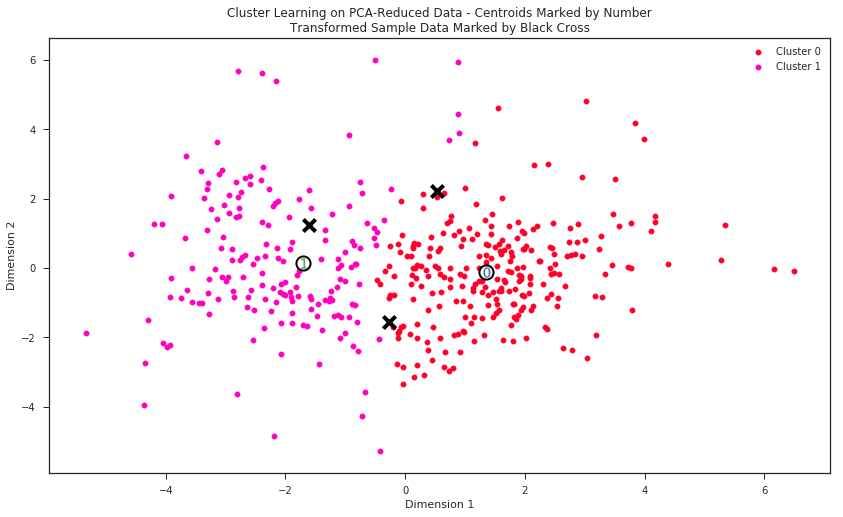

In [52]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [53]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
display(true_centers - data.median().round())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8716.0,2003.0,2627.0,2047.0,325.0,698.0
Segment 1,4374.0,6547.0,9846.0,1043.0,3198.0,971.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,212.0,-1624.0,-2129.0,521.0,-491.0,-268.0
Segment 1,-4130.0,2920.0,5090.0,-483.0,2382.0,5.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**


A customer assigned to Cluster 0 would best identify with  customers with `Fresh` by far, then at lower values  `Frozen`, `Grocery`, `Milk`  as seen by their distance to the mean. This cluster should identify most with a large retailer with a restaurant/deli common in North America. 


A customer assigned to Cluster 1 would best identify with  customer with mainly `Grocery`, `Milk`, and ` Detergents_Paper` as seen by the positive values of total purchase cost  minus mean value for each product category. This cluster should identify most with regular retailer.




### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [54]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**

Sample 0 is best represented by a large retailer with a restaurant/deli that are common in North America. This is consistent with the predictions obtained from the cluster 1.

Sample 1 is best represented a large retailer with a restaurant/deli. This is consistent with the predictions obtained from the clusters 0.

Sample 2 seems to not fit its predicted cluster 0. The highest expense for sample 2 is `Milk`, followed by `Grocery` more of a cluster 0.  This is not actually consistent with the predictions obtained from the clusters 0.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

To test changing its delivery service from currently 5 days a week to 3 days a week the wholesale distributor should run, in my opinion, a test by selecting two random groups from each cluster and run for a while the 3 days a week deliveries then compare the results. 

A random group that gets delivered the status quo, 5 days a week delivery and a random group that gets the new 3 days delivery service per cluster.

I am assuming the main metric to measure the effectiveness of the change is to compare the total amount of products ordered between 5 days and 3 days deliveries and take into account the added cost from increase delivery frequency. Compare 5 days with 3 days between cluster 0 and cluster 1. 

In addition, compare 3 days results of cluster 0 and 3 days results of cluster 1 group. Then run hypothesis tests to determine which group of customers it affects most.

Furthermore, the wholesale distributor could run an A/B test ignoring the cluster segmentation. This way the effectives of the clusters can also be assessed.  What I am trying to allude here is to see if statistical significance results are also practical.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

I am thinking a logistic regression model using the engineered feature 'customer segment' and total spend estimates as an input variables to predict the most appropriate delivery schedule.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

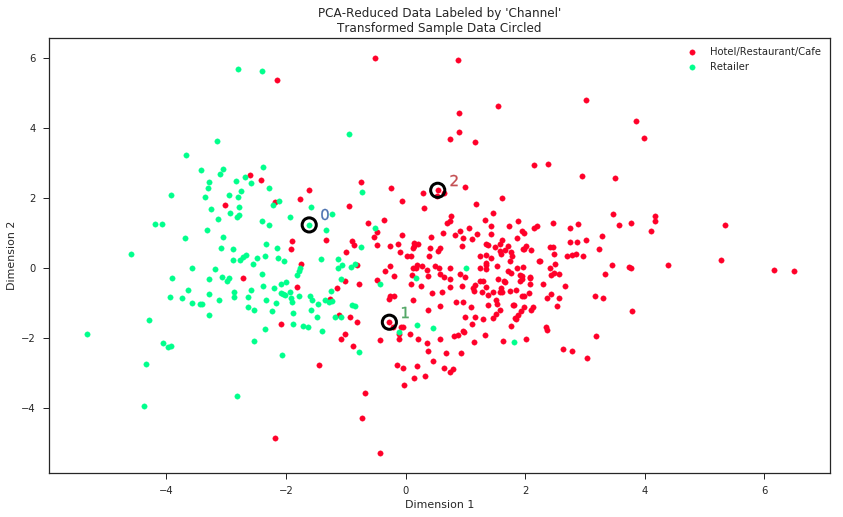

In [55]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

In [59]:
#calculate the accuracy score for clustering
channel_labels = pd.read_csv("customers.csv")["Channel"]
channel_labels = channel_labels.drop(channel_labels.index[outliers]).reset_index(drop = True) - 1
# -1 because channel_labels are 1 and 2, while our cluster-labels are 0 and 1
# channel_labels = abs(channel_labels -1)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(channel_labels,preds)
display(accuracy)

0.87586206896551722

**Answer:**

The clustering algorithm and the number of clusters chosen compare well with underlying distribution of Hotel/Restaurant/Cafe customers to Retailer.

There is some overlap or false positives of Hotels/Restaurants/Cafes customers in Retailer segment. This makes since considering the best silhouette coefficient if just 0.4239.

I consider these classifications as consistent with your previous definition of the customer segments.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.